<a href="https://colab.research.google.com/github/tmengab/lectureCode-sp23/blob/main/HSIanalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving HSI.xlsx to HSI (16).xlsx
Columns: Index(['Open', 'High', 'Low', 'Close', 'Up votes', 'Down votes', 'Date'], dtype='object')
            Up votes  Down votes
Date                            
2022-02-24      0.69        0.31
2022-02-25      0.36        0.64
2022-02-28      0.61        0.49
2022-03-01      0.49        0.51
2022-03-02      0.48        0.52


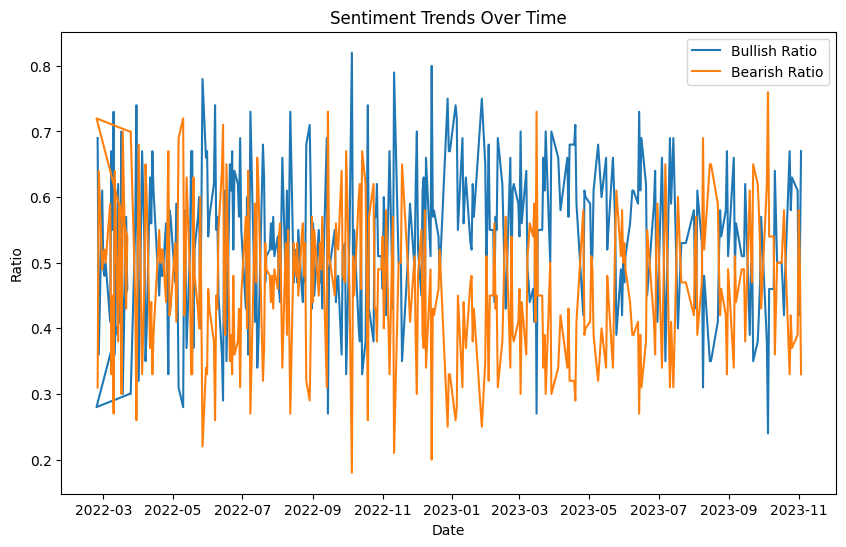

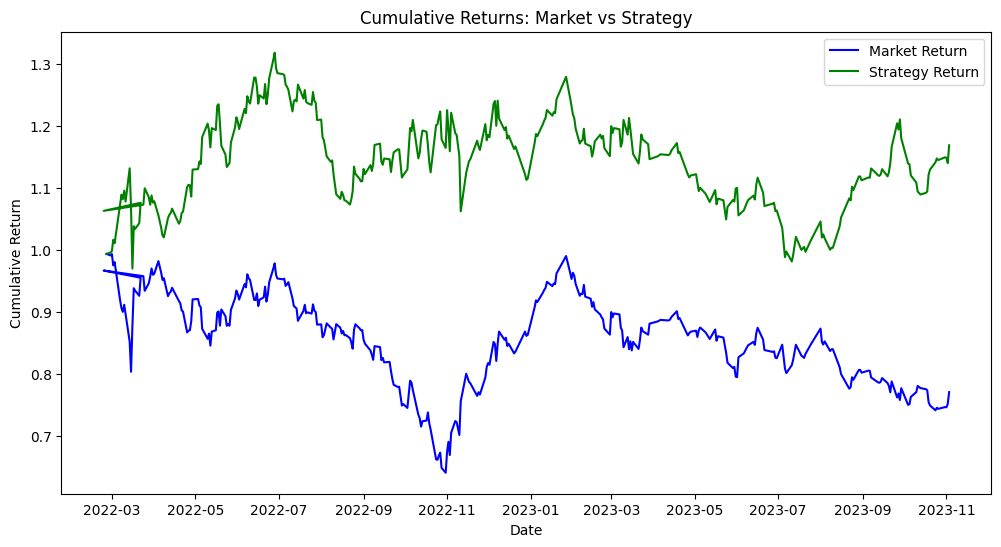

Backtest Results:
Total Market Return: -22.87%
Total Strategy Return: 16.93%
Annualized Market Return: -17.51%
Annualized Strategy Return: 12.29%
Market Volatility: 32.19%
Strategy Volatility: 32.19%
Market Sharpe Ratio: -0.54
Strategy Sharpe Ratio: 0.38
Max Drawdown (Market): -35.49%
Max Drawdown (Strategy): -25.53%


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
# 加载数据
data = pd.read_excel('HSI.xlsx')

# 数据清洗
data.dropna(inplace=True)  # 删除缺失值
data['Date'] = pd.to_datetime(data['Date'])  # 转换日期格式
data.set_index('Date', inplace=True)  # 设置日期为索引

# 将日期索引添加为一列
data['Date'] = data.index


# 打印列名和前几行数据
print("Columns:", data.columns)
print(data[['Up votes', 'Down votes']].head())

# 可视化情绪趋势
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Up votes'], label='Bullish Ratio')
plt.plot(data.index, data['Down votes'], label='Bearish Ratio')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()

# 生成交易信号
data['Signal'] = 0
data.loc[data['Up votes'] > 0.5, 'Signal'] = 1  # 买入信号
data.loc[data['Down votes'] > 0.49, 'Signal'] = -1  # 卖出信号

# 计算每日收益
data['Daily_Return'] = data['Close'].pct_change()  # 市场每日收益率
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']  # 策略每日收益率

# 累计收益计算
data['Cumulative_Market_Return'] = (1 + data['Daily_Return']).cumprod()  # 市场累计收益
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()  # 策略累计收益

# 绘制累计收益对比图
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Market_Return'], label='Market Return', color='blue')
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='Strategy Return', color='green')
plt.title('Cumulative Returns: Market vs Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# 回测结果分析
def backtest_analysis(data):
    # 总收益
    total_market_return = data['Cumulative_Market_Return'].iloc[-1] - 1
    total_strategy_return = data['Cumulative_Strategy_Return'].iloc[-1] - 1

    # 年化收益率
    trading_days = len(data)
    annualized_market_return = (1 + total_market_return) ** (252 / trading_days) - 1
    annualized_strategy_return = (1 + total_strategy_return) ** (252 / trading_days) - 1

    # 波动率
    market_volatility = data['Daily_Return'].std() * np.sqrt(252)
    strategy_volatility = data['Strategy_Return'].std() * np.sqrt(252)

    # 夏普比率（假设无风险利率为0）
    sharpe_ratio_market = annualized_market_return / market_volatility
    sharpe_ratio_strategy = annualized_strategy_return / strategy_volatility

    # 最大回撤
    market_rolling_max = data['Cumulative_Market_Return'].cummax()
    strategy_rolling_max = data['Cumulative_Strategy_Return'].cummax()
    market_drawdown = (data['Cumulative_Market_Return'] - market_rolling_max) / market_rolling_max
    strategy_drawdown = (data['Cumulative_Strategy_Return'] - strategy_rolling_max) / strategy_rolling_max
    max_drawdown_market = market_drawdown.min()
    max_drawdown_strategy = strategy_drawdown.min()

    # 输出回测结果
    print("Backtest Results:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Annualized Market Return: {annualized_market_return:.2%}")
    print(f"Annualized Strategy Return: {annualized_strategy_return:.2%}")
    print(f"Market Volatility: {market_volatility:.2%}")
    print(f"Strategy Volatility: {strategy_volatility:.2%}")
    print(f"Market Sharpe Ratio: {sharpe_ratio_market:.2f}")
    print(f"Strategy Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"Max Drawdown (Market): {max_drawdown_market:.2%}")
    print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}")

# 执行回测分析
backtest_analysis(data)



Saving HSI.xlsx to HSI (1).xlsx
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        416 non-null    datetime64[ns]
 1   Open        417 non-null    float64       
 2   High        417 non-null    float64       
 3   Low         417 non-null    float64       
 4   Close       417 non-null    float64       
 5   Up votes    340 non-null    float64       
 6   Down votes  340 non-null    float64       
 7   Spread      416 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 26.2 KB
None

First 5 Rows:
        Date      Open      High       Low     Close  Up votes  Down votes  \
0 2022-02-24  23268.03  23376.37  22786.39  22901.56      0.69        0.31   
1 2022-02-25  22908.10  23046.86  22718.15  22767.18      0.36        0.64   
2 2022-02-28  22818.17  22818.17  22406.12  22713.02   

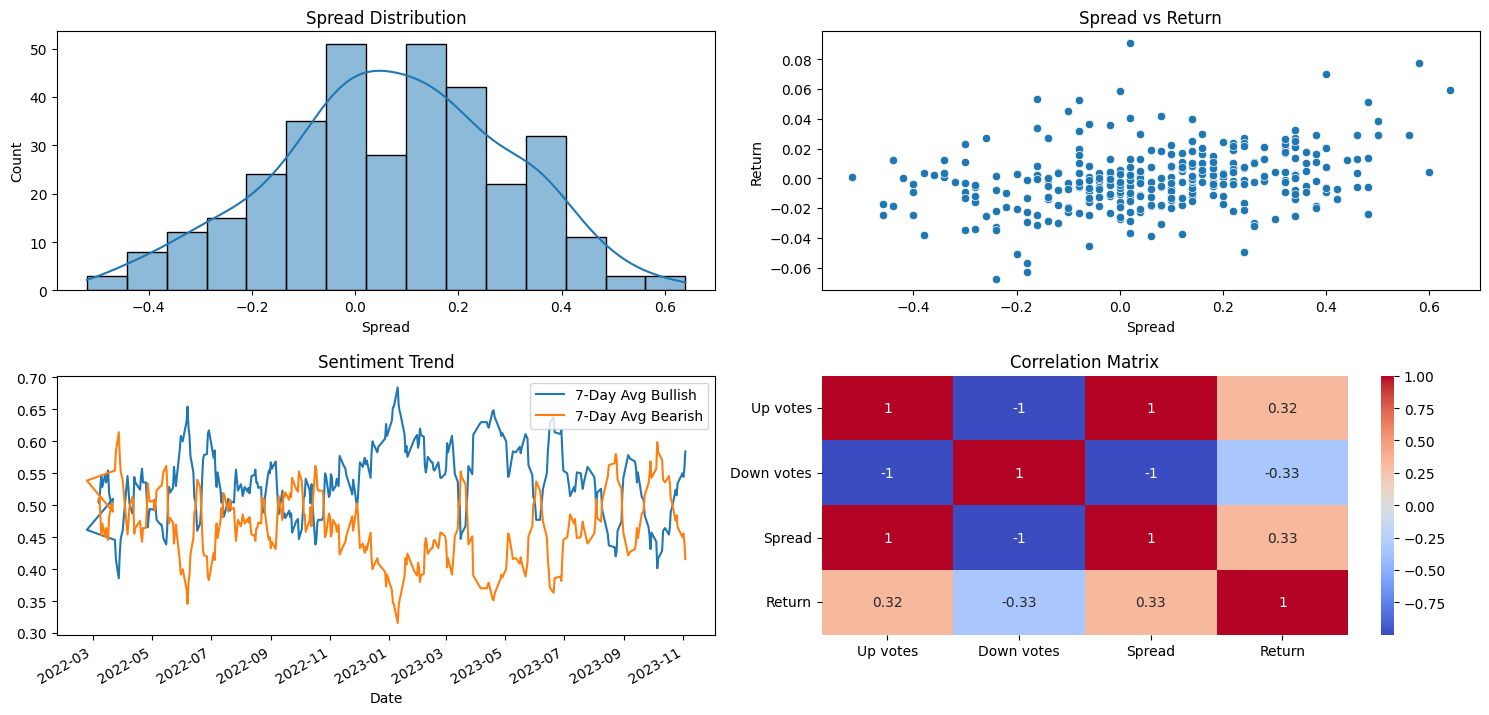

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

KeyError: 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files

# Upload and load data
uploaded = files.upload()
data = pd.read_excel('HSI.xlsx')

# =====================
# Data Exploration and Preprocessing
# =====================
print("Data Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Data Cleaning
data = data.dropna(subset=['Up votes', 'Down votes', 'Spread'])  # Remove rows with missing key fields
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Add Return Feature
data['Return'] = data['Close'].pct_change()

# Data Visualization
plt.figure(figsize=(15,10))

# Spread Distribution
plt.subplot(3,2,1)
sns.histplot(data['Spread'], kde=True)
plt.title('Spread Distribution')

# Spread vs Return Correlation
plt.subplot(3,2,2)
sns.scatterplot(x='Spread', y='Return', data=data)
plt.title('Spread vs Return')

# Time Series Trends
plt.subplot(3,2,3)
data['Up votes'].rolling(7).mean().plot(label='7-Day Avg Bullish')
data['Down votes'].rolling(7).mean().plot(label='7-Day Avg Bearish')
plt.title('Sentiment Trend')
plt.legend()

# Correlation Matrix
plt.subplot(3,2,4)
corr_matrix = data[['Up votes', 'Down votes', 'Spread', 'Return']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# =====================
# Time Series Regression Strategy
# =====================
# Use ARIMA Model to Predict Returns
ts_data = data[['Return']].dropna()
train_size = int(len(ts_data)*0.8)
train, test = ts_data[0:train_size], ts_data[train_size:]

model = ARIMA(train, order=(2,0,1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))[0]

# Generate Trading Signals
test['Predicted_Return'] = predictions
test['TS_Signal'] = np.where(test['Predicted_Return'] > 0, 1, -1)

# =====================
# Machine Learning Strategy
# =====================
# Feature Engineering
ml_data = data.copy()
ml_data['Spread_Lag1'] = ml_data['Spread'].shift(1)
ml_data['Return_Lag1'] = ml_data['Return'].shift(1)
ml_data['MA5'] = ml_data['Close'].rolling(5).mean()
ml_data['MA20'] = ml_data['Close'].rolling(20).mean()
ml_data['Label'] = np.where(ml_data['Return'].shift(-1) > 0, 1, -1)
ml_data = ml_data.dropna()

# Split Data
X = ml_data[['Spread', 'Spread_Lag1', 'Return_Lag1', 'MA5', 'MA20']]
y = ml_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

# Predict and Generate Signals
ml_data['ML_Signal'] = model_rf.predict(X)

# =====================
# Backtesting Analysis
# =====================
def backtest_strategy(data, signal_col):
    df = data.copy()
    df['Strategy_Return'] = df[signal_col].shift(1) * df['Return']
    df['Cumulative_Market'] = (1 + df['Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy_Return']).cumprod()
    return df[['Cumulative_Market', 'Cumulative_Strategy']]

# Backtest Time Series Strategy
ts_results = backtest_strategy(test, 'TS_Signal')

# Backtest Machine Learning Strategy
ml_results = backtest_strategy(ml_data, 'ML_Signal')

# Visualize Results
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ts_results.plot(title='Time Series Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.subplot(1,2,2)
ml_results.plot(title='Machine Learning Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.tight_layout()
plt.show()

# Calculate Backtest Metrics
def calculate_metrics(returns):
    total_return = returns.iloc[-1] - 1
    annualized_return = (1 + total_return) ** (252/len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe = annualized_return / volatility
    max_drawdown = (returns.cummax() - returns).max()
    return pd.Series({
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_drawdown
    })

print("\nTime Series Strategy Performance:")
print(calculate_metrics(ts_results['Cumulative_Strategy']))

print("\nMachine Learning Strategy Performance:")
print(calculate_metrics(ml_results['Cumulative_Strategy']))

Saving HSI.xlsx to HSI (2).xlsx
协方差矩阵：
           Return    Spread
Return  0.000355  0.001020
Spread  0.001020  0.049277


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

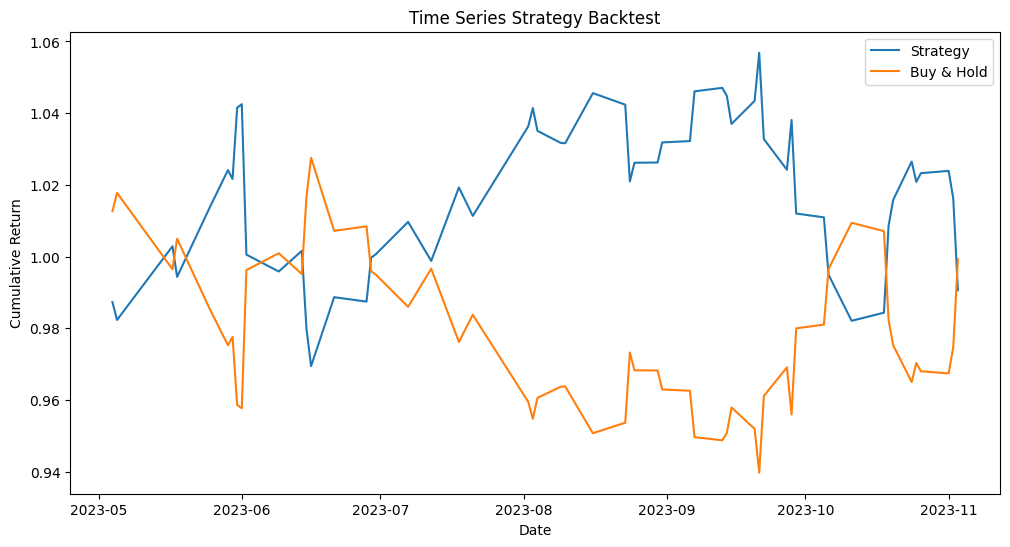

<ipython-input-3-af73bf1d9e08>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_Signal'] = model.predict(X_test)
<ipython-input-3-af73bf1d9e08>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Strategy_Return'] = test['Predicted_Signal'] * test['Return']
<ipython-input-3-af73bf1d9e08>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

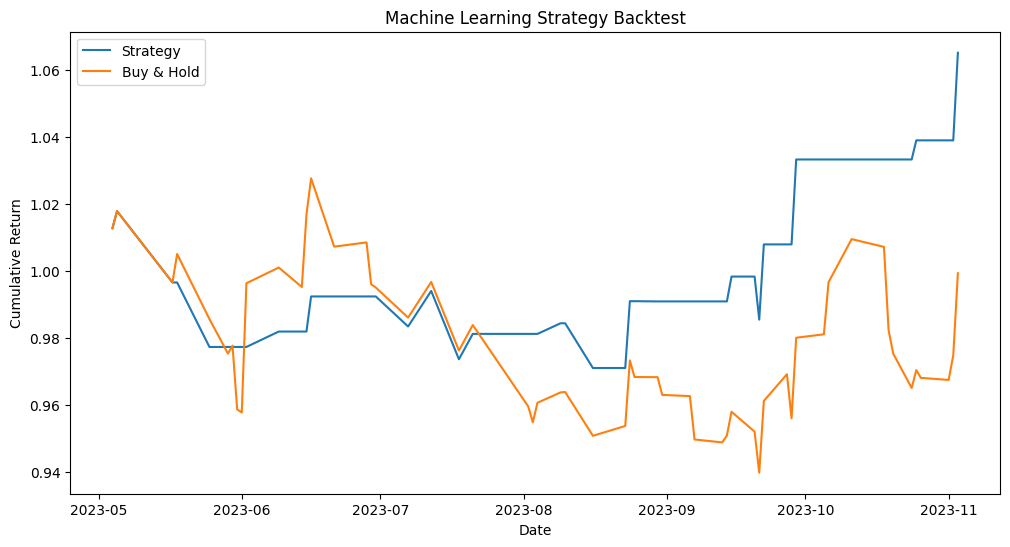

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()
# 加载数据
data = pd.read_excel('HSI.xlsx')


# 将日期索引添加为一列
data['Date'] = data.index

# 1. 加载数据
df = pd.read_excel('HSI.xlsx', parse_dates=['Date'], index_col='Date')
df['Spread'] = df['Up votes'] - df['Down votes']
df['Return'] = df['Close'].pct_change()

# 2. 处理缺失值
df['Spread_lag'] = df['Spread'].shift(1)  # 创建滞后变量
df['Return_lag'] = df['Return'].shift(1)
df = df.dropna()  # 删除缺失值

# 3. 计算协方差矩阵
cov_matrix = df[['Return', 'Spread']].cov()
print("协方差矩阵：\n", cov_matrix)

# 4. 时间序列回归策略
def time_series_strategy(df):
    # 划分训练集和测试集
    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    # 拟合ARIMA模型
    model = ARIMA(train['Return'], order=(1, 0, 1), exog=train[['Spread_lag']])
    model_fit = model.fit()

    # 预测
    predictions = model_fit.forecast(steps=len(test), exog=test[['Spread_lag']])
    test['Predicted_Return'] = predictions

    # 生成交易信号
    test['Signal'] = np.where(test['Predicted_Return'] > 0, 1, -1)
    test['Strategy_Return'] = test['Signal'] * test['Return']

    # 计算累计收益
    test['Cumulative_Strategy'] = (1 + test['Strategy_Return']).cumprod()
    test['Cumulative_Buy_Hold'] = (1 + test['Return']).cumprod()

    return test

# 5. 机器学习策略
def machine_learning_strategy(df):
    # 准备特征和目标变量
    df['Target'] = np.where(df['Return'].shift(-1) > 0, 1, 0)
    df = df.dropna()

    X = df[['Spread', 'Return_lag', 'Open', 'High', 'Low']]
    y = df['Target']

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # 训练随机森林模型
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)

    # 预测
    test = df.iloc[len(X_train):]
    test['Predicted_Signal'] = model.predict(X_test)
    test['Strategy_Return'] = test['Predicted_Signal'] * test['Return']

    # 计算累计收益
    test['Cumulative_Strategy'] = (1 + test['Strategy_Return']).cumprod()
    test['Cumulative_Buy_Hold'] = (1 + test['Return']).cumprod()

    return test

# 6. 回测和可视化
def backtest_and_plot(results, title):
    plt.figure(figsize=(12, 6))
    plt.plot(results['Cumulative_Strategy'], label='Strategy')
    plt.plot(results['Cumulative_Buy_Hold'], label='Buy & Hold')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()

# 7. 运行策略
# 时间序列策略
ts_results = time_series_strategy(df)
backtest_and_plot(ts_results, 'Time Series Strategy Backtest')

# 机器学习策略
ml_results = machine_learning_strategy(df)
backtest_and_plot(ml_results, 'Machine Learning Strategy Backtest')